In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("2.2.25_data.csv")

x_values = data["Var_X"].values.reshape(-1,1)
y_values = data["Var_Y"].values

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature2 = PolynomialFeatures(degree = 2)
x_poly2 = poly_feature2.fit_transform(x_values)

poly_feature3 = PolynomialFeatures(degree = 3)
x_poly3 = poly_feature3.fit_transform(x_values)

In [4]:
from sklearn.linear_model import LinearRegression
poly_model2 = LinearRegression()
poly_model2.fit(x_poly2, y_values)

poly_model3 = LinearRegression()
poly_model3.fit(x_poly3, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

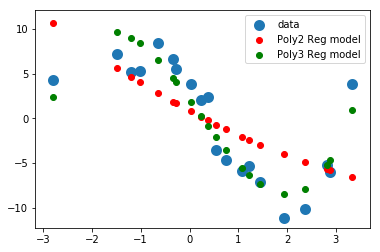

In [9]:
import matplotlib.pyplot as plt
plt.figure()

a2 = poly_model2.coef_
b2 = poly_model2.intercept_

a3 = poly_model3.coef_
b3 = poly_model3.intercept_

predictions2 = a2 @ x_poly2.T + b2
predictions3 = a3 @ x_poly3.T + b3

plt.scatter(x_values, y_values, lw=5, label="data")
plt.scatter(x_values, predictions2.reshape(20,1), color='red', label="Poly2 Reg model")
plt.scatter(x_values, predictions3.reshape(20,1), color='green', label="Poly3 Reg model")

plt.legend()
plt.plot()

[]

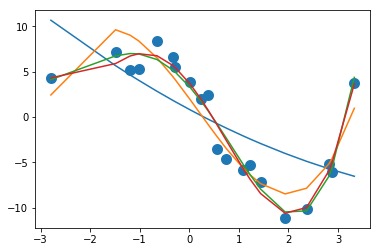

In [10]:
idx = np.argsort(x_values, axis=0)

plt.figure()
plt.scatter(x_values, y_values, lw=5, label="data")

for n in range(2,6):
    poly_feature_n = PolynomialFeatures(degree = n)
    x_poly_n = poly_feature_n.fit_transform(x_values)
    poly_model_n = LinearRegression()
    poly_model_n.fit(x_poly_n, y_values)
    a_n = poly_model_n.coef_
    b_n = poly_model_n.intercept_
    predictions_n = a_n @ x_poly_n.T + b_n
   
    plt.plot(x_values[idx].reshape(20,), predictions_n[idx].reshape(20,))

plt.plot()